<a href="https://colab.research.google.com/github/alexre24/Project-2/blob/main/Stroke_Prediction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
import sys
from sklearn.model_selection import train_test_split 

## Loading Data

In [3]:
path = '/content/drive/MyDrive/Coding Dojo/07 Week 7: Classification/healthcare-dataset-stroke-data 2.csv'
stroke_df = pd.read_csv(path)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Cleaning

In [4]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- There are 12 columns and 5110 rows
- The bmi column is missing data, which will have to be dealt with using Simple Imputer

In [5]:
#Dropping unnecessary columns
stroke_df = stroke_df.drop(columns = 'id')

In [6]:
#Checking for missing values
print(f'There are {stroke_df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [7]:
# Getting the balance of data for the target values
stroke_df['stroke'].value_counts(normalize = True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

- This data is extremely unbalanced- 95% of data points are in the 0 class

In [8]:
#Check for duplicates
print(f'There are {stroke_df.duplicated().sum()} duplicates.')

There are 0 duplicates.


In [9]:
#Check the data types of each column
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
#Check for inconsistent values
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
stroke_df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
stroke_df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [13]:
stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [14]:
stroke_df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
#Checking for impossible values
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Visuals

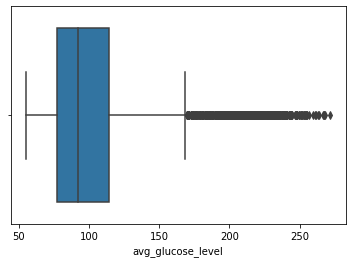

In [16]:
sns.boxplot(data = stroke_df, x = 'avg_glucose_level');

- This is a boxplot showing the distribution of the average glucose level of patients. The median is about 75. There are outliers in this column that need to be removed.  


In [17]:
#Check for outliers
print(np.where(stroke_df['avg_glucose_level']>170))

(array([   0,    1,    3,    4,    5,   13,   14,   16,   17,   19,   20,
         21,   22,   23,   27,   28,   29,   30,   32,   33,   36,   44,
         45,   54,   55,   57,   58,   59,   60,   66,   71,   73,   76,
         90,   95,   97,  101,  102,  107,  113,  115,  122,  123,  124,
        128,  130,  132,  134,  135,  137,  138,  139,  144,  149,  151,
        155,  157,  158,  163,  175,  179,  187,  189,  190,  193,  195,
        196,  201,  212,  215,  217,  218,  219,  220,  222,  225,  226,
        233,  234,  235,  241,  242,  243,  254,  256,  258,  272,  277,
        278,  293,  298,  303,  307,  314,  318,  325,  326,  330,  331,
        332,  337,  343,  350,  355,  360,  365,  386,  396,  399,  411,
        417,  426,  429,  433,  436,  444,  456,  466,  467,  468,  477,
        479,  492,  515,  544,  549,  551,  552,  559,  563,  570,  576,
        581,  583,  585,  595,  598,  599,  610,  616,  620,  642,  706,
        708,  719,  744,  746,  755,  762,  770,  

In [18]:
#Drop rows with outliers
stroke_df.drop([0,    1,    3,    4,    5,   13,   14,   16,   17,   19,   20,
         21,   22,   23,   27,   28,   29,   30,   32,   33,   36,   44,
         45,   54,   55,   57,   58,   59,   60,   66,   71,   73,   76,
         90,   95,   97,  101,  102,  107,  113,  115,  122,  123,  124,
        128,  130,  132,  134,  135,  137,  138,  139,  144,  149,  151,
        155,  157,  158,  163,  175,  179,  187,  189,  190,  193,  195,
        196,  201,  212,  215,  217,  218,  219,  220,  222,  225,  226,
        233,  234,  235,  241,  242,  243,  254,  256,  258,  272,  277,
        278,  293,  298,  303,  307,  314,  318,  325,  326,  330,  331,
        332,  337,  343,  350,  355,  360,  365,  386,  396,  399,  411,
        417,  426,  429,  433,  436,  444,  456,  466,  467,  468,  477,
        479,  492,  515,  544,  549,  551,  552,  559,  563,  570,  576,
        581,  583,  585,  595,  598,  599,  610,  616,  620,  642,  706,
        708,  719,  744,  746,  755,  762,  770,  785,  816,  846,  848,
        851,  865,  867,  880,  887,  894,  923,  929,  930,  946,  948,
        970,  971, 1011, 1059, 1061, 1067, 1070, 1071, 1092, 1097, 1102,
       1104, 1113, 1118, 1131, 1158, 1166, 1173, 1178, 1187, 1189, 1200,
       1202, 1207, 1214, 1225, 1228, 1233, 1245, 1250, 1257, 1277, 1282,
       1300, 1309, 1319, 1322, 1339, 1343, 1346, 1379, 1382, 1384, 1398,
       1411, 1412, 1414, 1436, 1453, 1457, 1468, 1472, 1474, 1485, 1487,
       1497, 1503, 1512, 1526, 1529, 1531, 1533, 1534, 1535, 1540, 1547,
       1553, 1588, 1596, 1598, 1607, 1626, 1627, 1628, 1650, 1654, 1655,
       1659, 1667, 1675, 1681, 1698, 1704, 1711, 1718, 1723, 1732, 1737,
       1756, 1759, 1769, 1778, 1780, 1782, 1795, 1798, 1816, 1820, 1827,
       1837, 1840, 1841, 1843, 1853, 1862, 1873, 1880, 1888, 1889, 1892,
       1893, 1898, 1905, 1952, 1971, 1981, 1995, 2004, 2018, 2044, 2059,
       2067, 2069, 2079, 2081, 2089, 2096, 2102, 2107, 2124, 2126, 2129,
       2132, 2135, 2149, 2158, 2161, 2168, 2169, 2180, 2182, 2185, 2200,
       2201, 2203, 2223, 2228, 2240, 2255, 2257, 2273, 2282, 2284, 2290,
       2291, 2292, 2293, 2294, 2303, 2307, 2318, 2332, 2336, 2338, 2365,
       2374, 2383, 2395, 2418, 2429, 2439, 2453, 2455, 2459, 2462, 2469,
       2486, 2493, 2494, 2515, 2520, 2523, 2532, 2540, 2544, 2548, 2553,
       2565, 2569, 2578, 2583, 2599, 2600, 2609, 2612, 2624, 2629, 2633,
       2641, 2661, 2675, 2676, 2679, 2682, 2685, 2686, 2690, 2693, 2697,
       2699, 2707, 2710, 2734, 2751, 2752, 2757, 2768, 2846, 2848, 2849,
       2855, 2866, 2867, 2880, 2890, 2893, 2918, 2928, 2934, 2947, 2957,
       2960, 2966, 2981, 2992, 2997, 3005, 3008, 3014, 3017, 3054, 3060,
       3069, 3074, 3088, 3130, 3146, 3148, 3150, 3152, 3157, 3161, 3186,
       3197, 3198, 3215, 3221, 3234, 3238, 3243, 3252, 3306, 3318, 3327,
       3342, 3350, 3360, 3375, 3376, 3378, 3381, 3387, 3391, 3393, 3406,
       3425, 3427, 3439, 3455, 3461, 3462, 3478, 3480, 3489, 3500, 3507,
       3510, 3517, 3522, 3536, 3537, 3548, 3564, 3578, 3587, 3594, 3599,
       3600, 3606, 3625, 3627, 3630, 3637, 3643, 3658, 3674, 3686, 3688,
       3699, 3700, 3718, 3734, 3753, 3756, 3771, 3772, 3779, 3780, 3781,
       3788, 3802, 3833, 3882, 3889, 3892, 3905, 3909, 3913, 3925, 3931,
       3943, 3956, 3959, 3962, 3964, 3965, 3980, 3982, 3994, 4008, 4022,
       4028, 4037, 4046, 4048, 4051, 4054, 4096, 4104, 4123, 4129, 4132,
       4164, 4176, 4201, 4207, 4240, 4249, 4261, 4274, 4283, 4286, 4290,
       4291, 4304, 4311, 4321, 4324, 4325, 4327, 4329, 4335, 4339, 4344,
       4356, 4360, 4366, 4376, 4377, 4390, 4434, 4437, 4446, 4447, 4453,
       4457, 4470, 4475, 4497, 4500, 4504, 4505, 4507, 4514, 4515, 4530,
       4539, 4560, 4577, 4578, 4582, 4588, 4589, 4598, 4616, 4625, 4627,
       4628, 4636, 4654, 4665, 4684, 4696, 4702, 4708, 4711, 4724, 4737,
       4738, 4739, 4740, 4750, 4763, 4809, 4816, 4823, 4836, 4855, 4861,
       4869, 4883, 4895, 4899, 4909, 4921, 4925, 4941, 4952, 4955, 4983,
       4984, 4986, 4987, 4995, 5001, 5006, 5019, 5029, 5034, 5035, 5041,
       5048, 5061, 5062, 5063, 5064, 5076],  inplace = True)

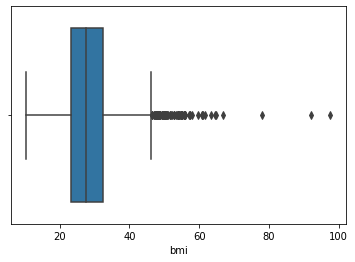

In [19]:
#Creating a box plot for bmi
sns.boxplot(data = stroke_df, x = 'bmi');

- This is a boxplot showing the distribution of the bmi of patients. The median is about 27. There are outliers in this column that need to be removed.

In [20]:
np.set_printoptions(threshold=sys.maxsize)

In [21]:
print(np.where(stroke_df['bmi']>44))

(array([  46,   47,  116,  184,  233,  240,  254,  262,  281,  305,  317,
        340,  345,  370,  396,  415,  481,  496,  520,  530,  571,  613,
        654,  682,  705,  767,  836,  837,  840,  848,  902,  904,  905,
       1046, 1070, 1071, 1085, 1092, 1105, 1115, 1242, 1280, 1306, 1327,
       1332, 1343, 1352, 1362, 1402, 1417, 1442, 1667, 1707, 1719, 1733,
       1783, 1832, 1837, 1898, 1920, 1950, 1961, 1974, 1984, 2004, 2044,
       2061, 2078, 2105, 2113, 2118, 2195, 2203, 2214, 2229, 2282, 2312,
       2346, 2383, 2433, 2457, 2458, 2494, 2505, 2592, 2619, 2797, 2879,
       2904, 2914, 3057, 3085, 3109, 3128, 3227, 3339, 3375, 3380, 3392,
       3427, 3528, 3559, 3611, 3637, 3668, 3669, 3688, 3702, 3704, 3756,
       3761, 3808, 3812, 3837, 3860, 3862, 3906, 3972, 3995, 4008, 4042,
       4076, 4114, 4125, 4191, 4246, 4255, 4265, 4298, 4308, 4372, 4398,
       4404, 4440, 4481]),)


In [22]:
# Dropping rows with outliers
stroke_df.drop([ 46,   47,  116,  184,  240,  262,  281,  305,  317,
        340,  345,  370,  415,  481,  496,  520,  530,  571,  613,
        654,  682,  705,  767,  836,  837,  840,  902,  904,  905,
       1046, 1085, 1105, 1115, 1242, 1280, 1306, 1327,
       1332, 1352, 1362, 1402, 1417, 1442, 1707, 1719, 1733,
       1783, 1832, 1920, 1950, 1961, 1974, 1984,
       2061, 2078, 2105, 2113, 2118, 2195, 2214, 2229, 2312,
       2346, 2433, 2457, 2458, 2505, 2592, 2619, 2797, 2879,
       2904, 2914, 3057, 3085, 3109, 3128, 3227, 3339, 3380, 3392,
       3528, 3559, 3611, 3668, 3669, 3702, 3704,
       3761, 3808, 3812, 3837, 3860, 3862, 3906, 3972, 3995, 4042,
       4076, 4114, 4125, 4191, 4246, 4255, 4265, 4298, 4308, 4372, 4398,
       4404, 4440, 4481],  inplace = True)

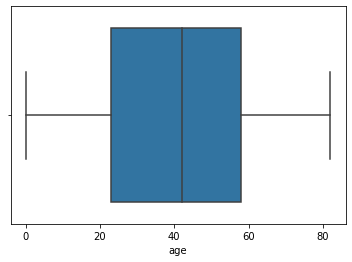

In [23]:
sns.boxplot(data = stroke_df, x = 'age');

- This is a boxplot showing the distribution of ages of the patients in the dataset. The median age is 41

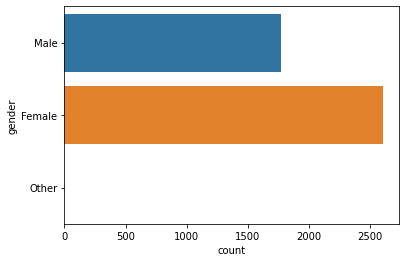

In [24]:
sns.countplot(data = stroke_df, y = 'gender');

- This is a countplot showing the counts of each gender in the dataset. There are more females than males in the data. 

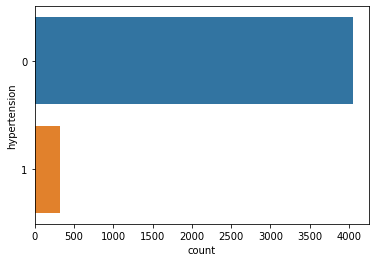

In [25]:
sns.countplot(data = stroke_df, y = 'hypertension');

- This is a countplot showing the amount of patients in the dataset that have hypertension. The majority do not. 

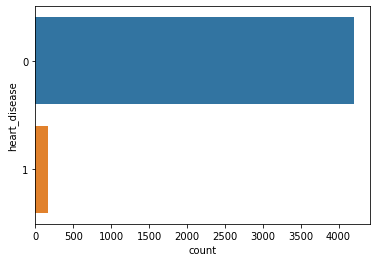

In [26]:
sns.countplot(data = stroke_df, y = 'heart_disease');

- This is a countplot showing the amount of patients in the dataset that have heart disease. The majority do not.

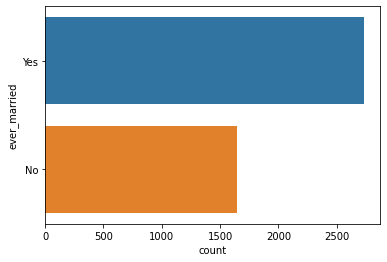

In [27]:
sns.countplot(data = stroke_df, y = 'ever_married');

- This is a countplot showing the amount of patients in the dataset that have been married. More have been married than have not. 

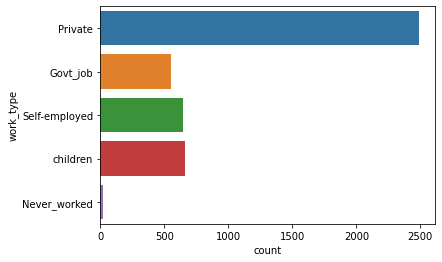

In [28]:
sns.countplot(data = stroke_df, y = 'work_type');

- This is a countplot showing the amount of patients in the dataset with different types of jobs. Patients most frequently work privately.

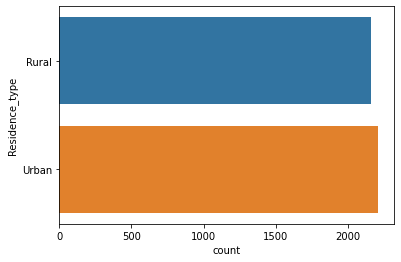

In [29]:
sns.countplot(data = stroke_df, y = 'Residence_type');

- This is a countplot showing the amount of patients that live in an urban or rural area. There is an even split between both areas.

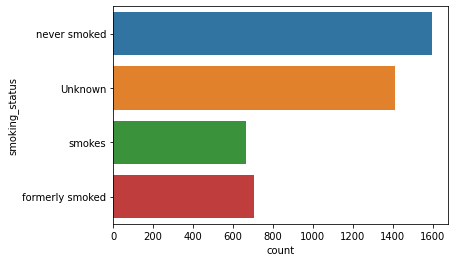

In [30]:
sns.countplot(data = stroke_df, y = 'smoking_status');

- This is a countplot showing how many patients smoke or have smoked. There is a large amount patients with an unknown status in this area.

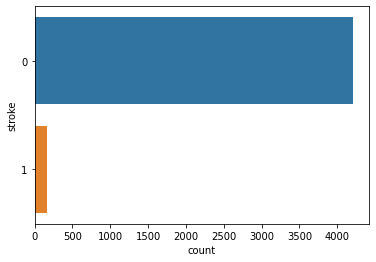

In [31]:
sns.countplot(data = stroke_df, y = 'stroke');

- This is a countplot showing the how many patients have had a stroke. The majority of patients have not had a stroke. This is my target column. 

## Explanatory Visuals

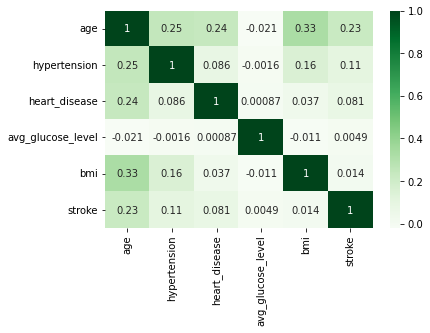

In [33]:
# Creating a heatmap to see the correlation of different features
corr = stroke_df.corr()
sns.heatmap(corr, cmap = "Greens", annot = True);

- There is a moderate positive correlation between strokes and age and hypertension. The strongest correlation in the heatmap is between age and bmi. Age and heart disease also have a moderate correlation.

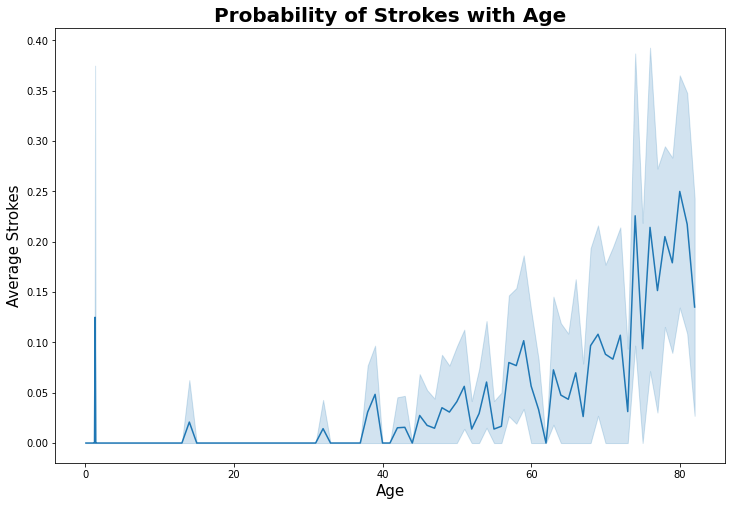

In [38]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.lineplot(data = stroke_df, x = 'age', y = 'stroke')
ax.set_title("Probability of Strokes with Age", fontsize = 20, fontweight = "bold")
ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Average Strokes", fontsize = 15);

- This is a lineplot that shows the relationship between age and strokes in the patients. This shows that as age increases, the average number of strokes in patients also increases. Therefore, you are more likely to have a stroke as you get older. 

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

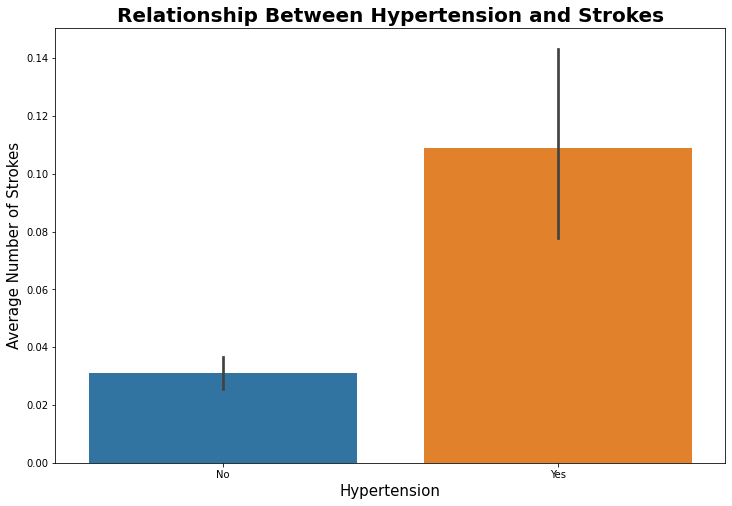

In [42]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(data = stroke_df, x = 'hypertension', y = 'stroke')
ax.set_title("Relationship Between Hypertension and Strokes", fontsize = 20, fontweight = "bold")
ax.set_xlabel("Hypertension", fontsize = 15)
ax.set_ylabel("Average Number of Strokes", fontsize = 15);
ax.set_xticklabels(['No', 'Yes'])

- This is a barplot that shows the relationship between hypertension and strokes. The graph shows that those with hypertension are more likely to have a stroke than those that do not have hypertension. 